In [54]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from IPython.display import display
def display_matrix(m):
    display(sympy.Matrix(m))
import sympy
import pandas as pd
import scipy.stats as ss
import matplotlib.dates as mdates

sympy.init_printing()

In [55]:
#read csv file "SP500.csv" into a dataframe
#df = pd.read_csv("SP500.csv", index_col=0, parse_dates=True)

df = pd.read_csv('SP500.csv', index_col=1, parse_dates=['Date'])

df1 = pd.read_csv('SAS-DKK.CO.csv', index_col='Date', parse_dates=['Date'])

df2 = pd.read_csv('LEHKQ.csv', index_col='Date', parse_dates=['Date'])

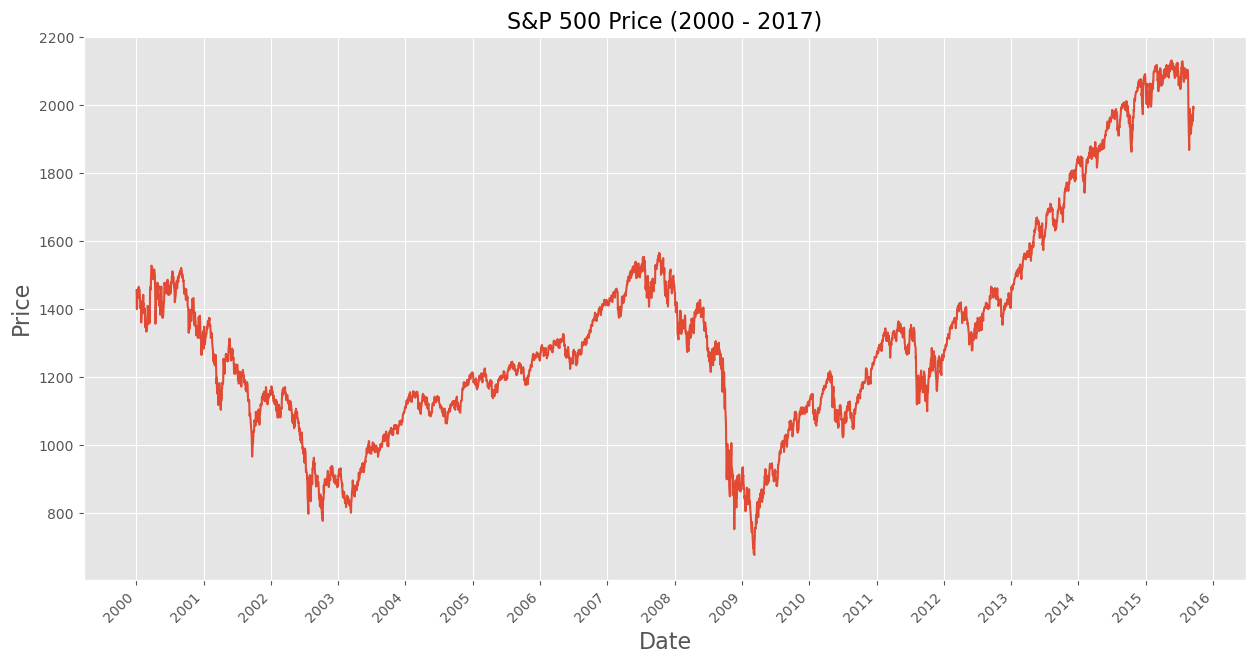

In [56]:
# Read the CSV file into a DataFrame
df = pd.read_csv('SP500.csv', index_col='Date', parse_dates=['Date'])

# Filter the DataFrame to include data from 2000 onwards
df_2000_onwards = df[df.index.year >= 2000]

# Plot the "SP500 - Price" column
plt.figure(figsize=(15, 8))
df_2000_onwards["SP500 - Price"].plot()

# Format the x-axis to show labels every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Setting labels and title
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("S&P 500 Price (2000 - 2017)", fontsize=16)

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

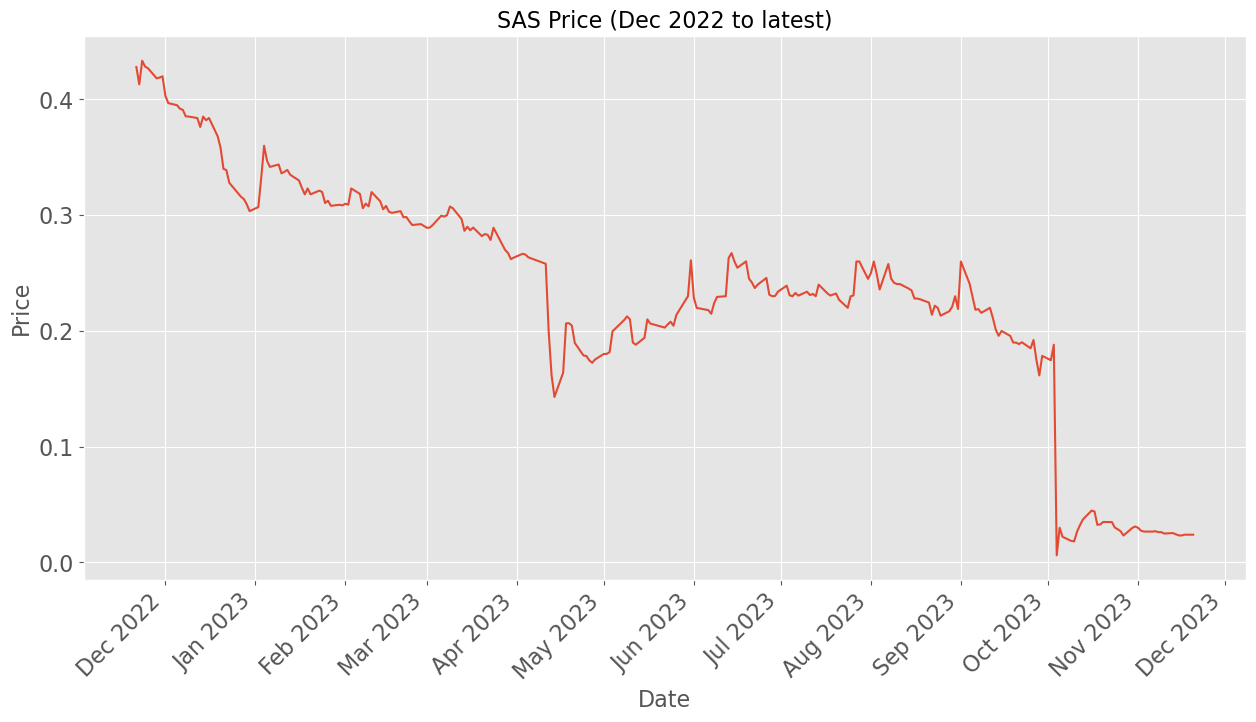

In [57]:
plt.figure(figsize=(15, 8))
df1["Open"].plot(figsize=(15, 8), fontsize=16)

# Format the x-axis to show labels every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Setting labels and title
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)

plt.title("SAS Price (Dec 2022 to latest)", fontsize=16)

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()


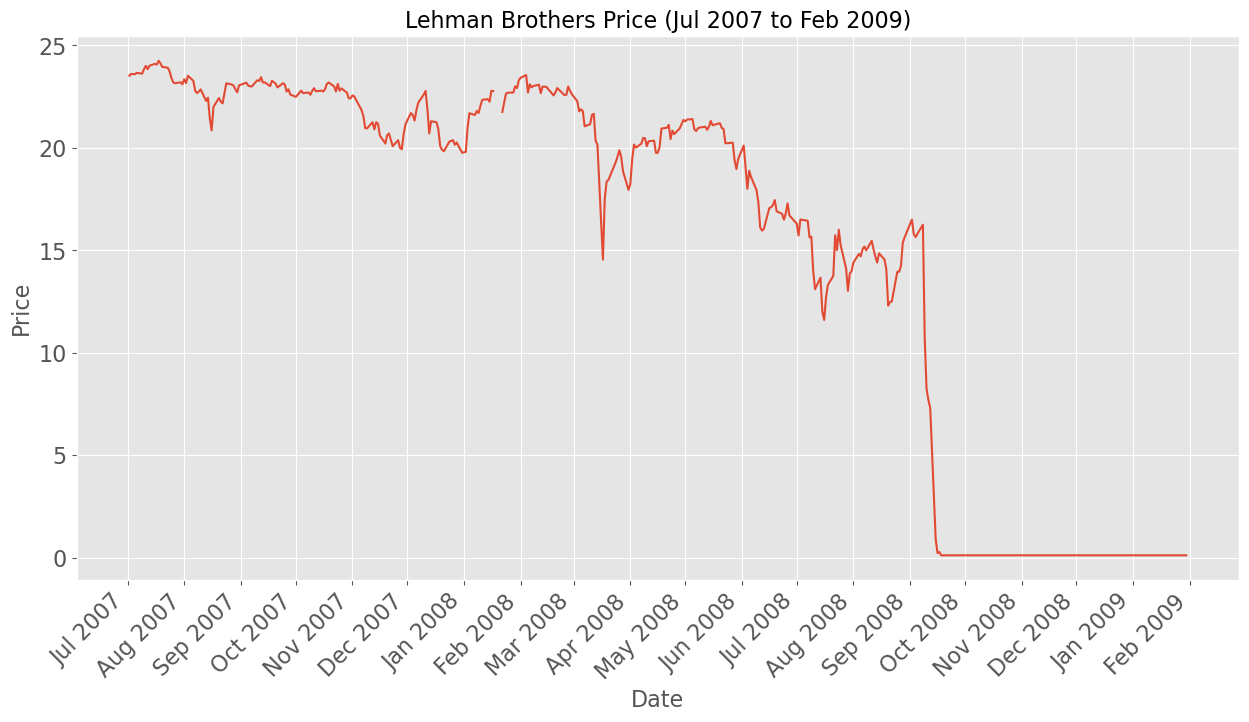

In [60]:
plt.figure(figsize=(15, 8))
df2["Open"].plot(figsize=(15, 8), fontsize=16)

# Format the x-axis to show labels every month

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Setting labels and title

plt.xlabel("Date", fontsize=16)

plt.ylabel("Price", fontsize=16)

plt.title("Lehman Brothers Price (Jul 2007 to Feb 2009)", fontsize=16)

# Rotate date labels for better readability

plt.xticks(rotation=45)

plt.show()

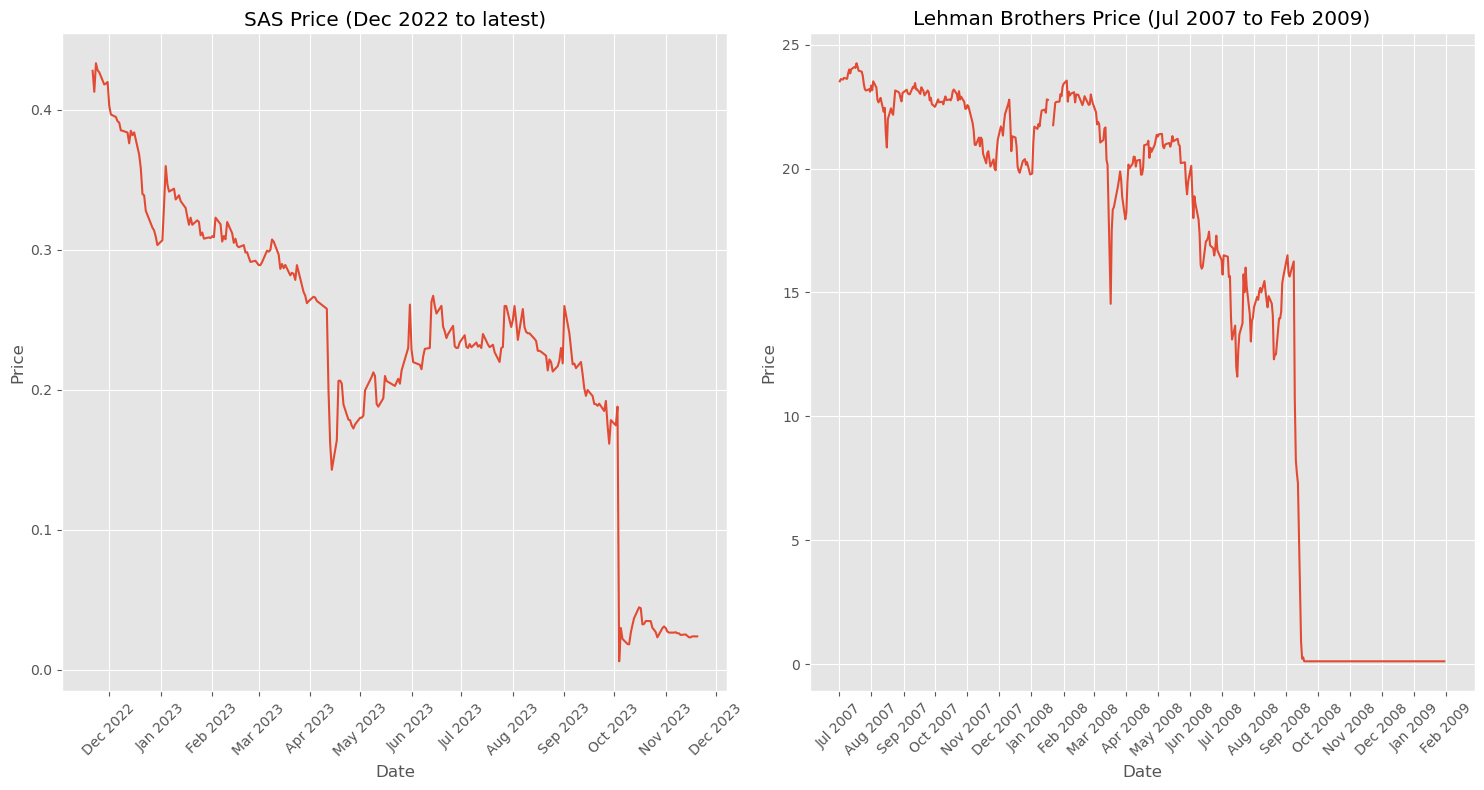

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reading the CSV files
df = pd.read_csv('SP500.csv', index_col='Date', parse_dates=['Date'])
df1 = pd.read_csv('SAS-DKK.CO.csv', index_col='Date', parse_dates=['Date'])
df2 = pd.read_csv('LEHKQ.csv', index_col='Date', parse_dates=['Date'])

# Filter the DataFrame to include data from 2000 onwards for S&P 500
df_2000_onwards = df[df.index.year >= 2000]

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plotting SAS
axs[0].plot(df1["Open"])
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs[0].set_title("SAS Price (Dec 2022 to latest)")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Price")
axs[0].tick_params(axis='x', rotation=45)

# Plotting Lehman Brothers
axs[1].plot(df2["Open"])
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs[1].set_title("Lehman Brothers Price (Jul 2007 to Feb 2009)")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Price")
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [153]:
def matrix(S0, paths, lam, sigma, mu, v, m, T, I):
    np.random.seed(1)
    df = np.exp(-mu*T)
    matrix = np.zeros((paths, I))
    for k in range(paths):
        X = np.zeros(I)
        S = np.zeros(I)
        
        X[0] = np.log(S0)
        S[0] = S0
        dt = T / I
    
        for i in range(1,I):
            Z = np.random.standard_normal()
            N = np.random.poisson(lam * dt)
            Y = np.exp(np.random.normal(m,v,N))
    
            if N == 0:
                M = 0
    
            else:
                for j in range(N):
                    M = np.sum(np.log(Y))
                    
            X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
            S[i] = np.exp(X[i])
        matrix[k] = S
    return matrix


# drop model

def drop(S0, paths, lam, sigma, mu, v, m, T, I):
    np.random.seed(1)
    df = np.exp(-mu*T)
    matrix = np.zeros((paths, I))
    for k in range(paths):
        X = np.zeros(I)
        S = np.zeros(I)

        X[0] = np.log(S0)
        S[0] = S0
        dt = T / I
    
        for i in range(1,I):
            Z = np.random.standard_normal()
            N = np.random.poisson(lam * dt)
            Y = np.exp(np.random.normal(m,v,N))
    
            if N == 0 and X[i-1] > 0:
                X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z
                S[i] = np.exp(X[i])
            else:
                S[i] = 0
        matrix[k] = S
    return matrix

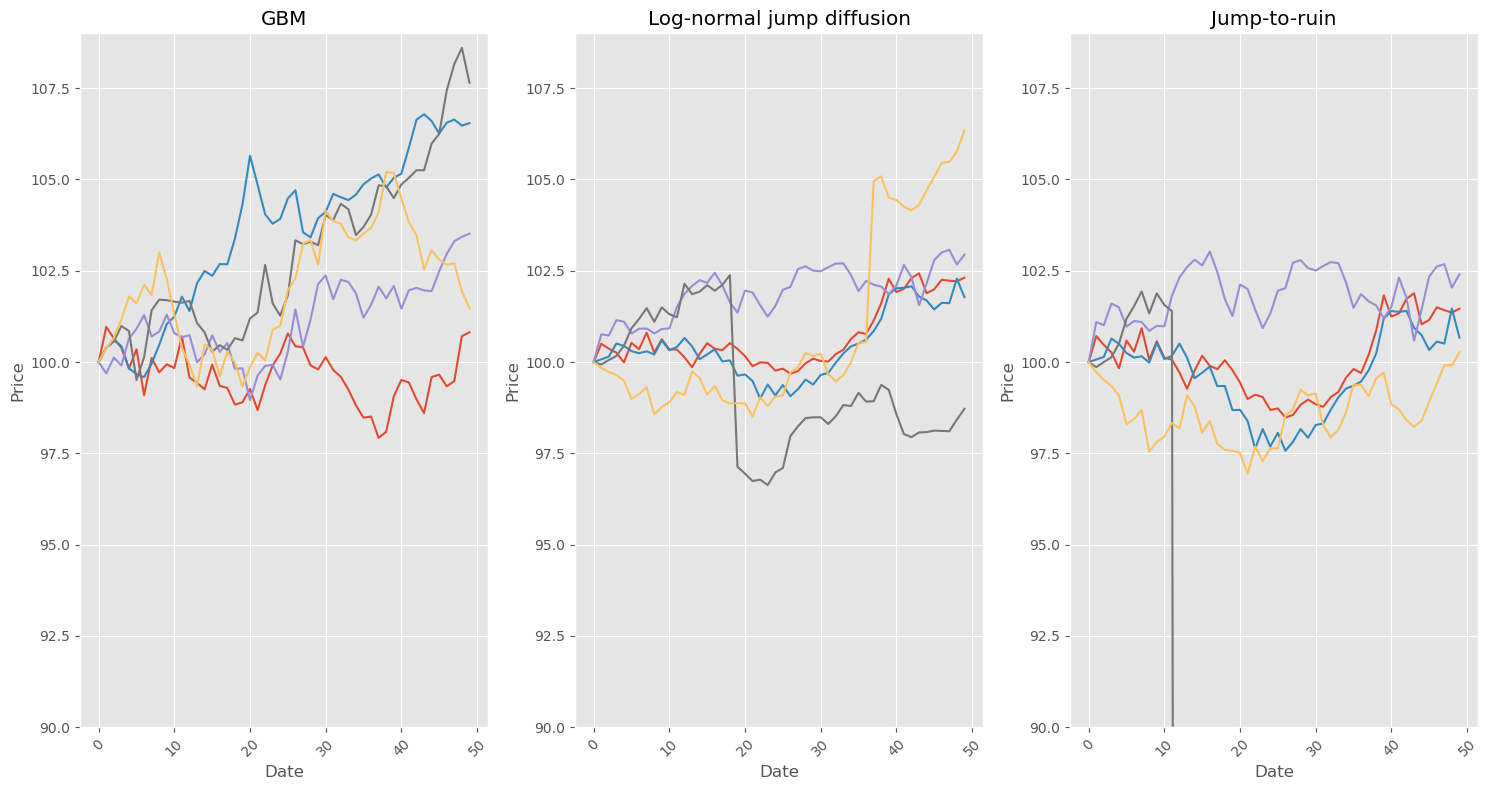

In [164]:
deg = 3
basis = 'legendre'
#initial price list
S0_list = np.arange(97, 104 , 1)
K = 100
S0 = 100

mu = 0.02
T = 1
I = 50
paths = 5
m = 0

GBM_lam = 0
GBM_sigma = 0.04
GBM_mu = mu
GBM_v = 0

Merton_lam = 1
Merton_sigma = 0.02
Merton_mu = mu
Merton_v = 0.04

Drop_lam = 0.7
Drop_sigma = 0.03
Drop_mu = 0.01

df = np.exp(-mu*T)

GBM = matrix(100, paths, lam=GBM_lam, sigma=GBM_sigma, mu=GBM_mu, v=GBM_v, m=m, T=T, I=I)
Merton = matrix(100, paths, lam=Merton_lam, sigma=Merton_sigma, mu=Merton_mu, v=Merton_v, T=T, I=I, m=m)
Drop = drop(100, paths, lam=Drop_lam, sigma=Drop_sigma, mu=Drop_mu, T=T, I=I, m=m, v=0)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 8))

axs[0].plot(GBM.T, lw=1.5)
axs[0].set_title("GBM")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Price")
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylim([90, 109])  # Set y-axis range from 90 to 109

axs[1].plot(Merton.T, lw=1.5)
axs[1].set_title("Log-normal jump diffusion")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Price")
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_ylim([90, 109])  # Set y-axis range from 90 to 109

axs[2].plot(Drop.T, lw=1.5)
axs[2].set_title("Jump-to-ruin")
axs[2].set_xlabel("Date")
axs[2].set_ylabel("Price")
axs[2].tick_params(axis='x', rotation=45)
axs[2].set_ylim([90, 109])  # Set y-axis range from 90 to 109

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Text(0, 0.5, 'index level')

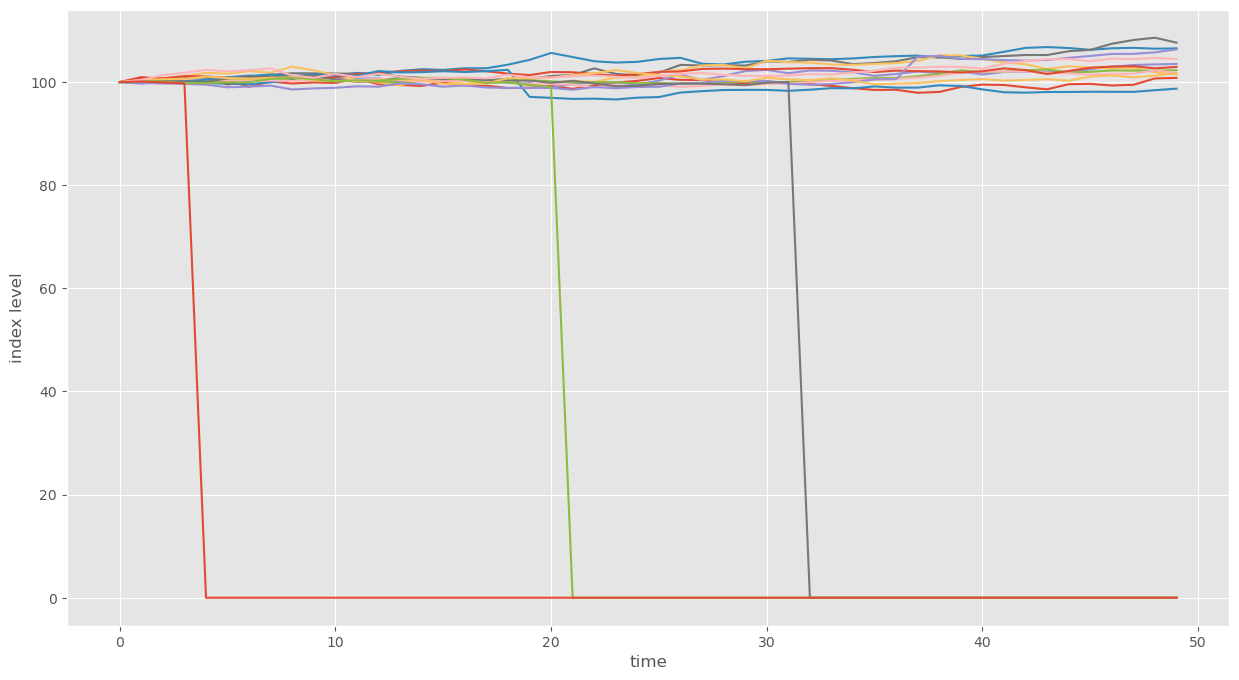

In [150]:
GBM = matrix(100, paths, lam=GBM_lam, sigma=GBM_sigma, mu=GBM_mu, v=GBM_v, m=m, T=T, I=I)
Merton = matrix(100, paths, lam=Merton_lam, sigma=Merton_sigma, mu=Merton_mu, v=Merton_v, T=T, I=I, m=m)
Drop = drop(100, paths, lam=Drop_lam, sigma=Drop_sigma, mu=Drop_mu, T=T, I=I, m=m, v=0)

plt.figure(figsize=(15, 8))
plt.plot(GBM.T, lw=1.5)
plt.plot(Merton.T, lw=1.5)
plt.plot(Drop.T, lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

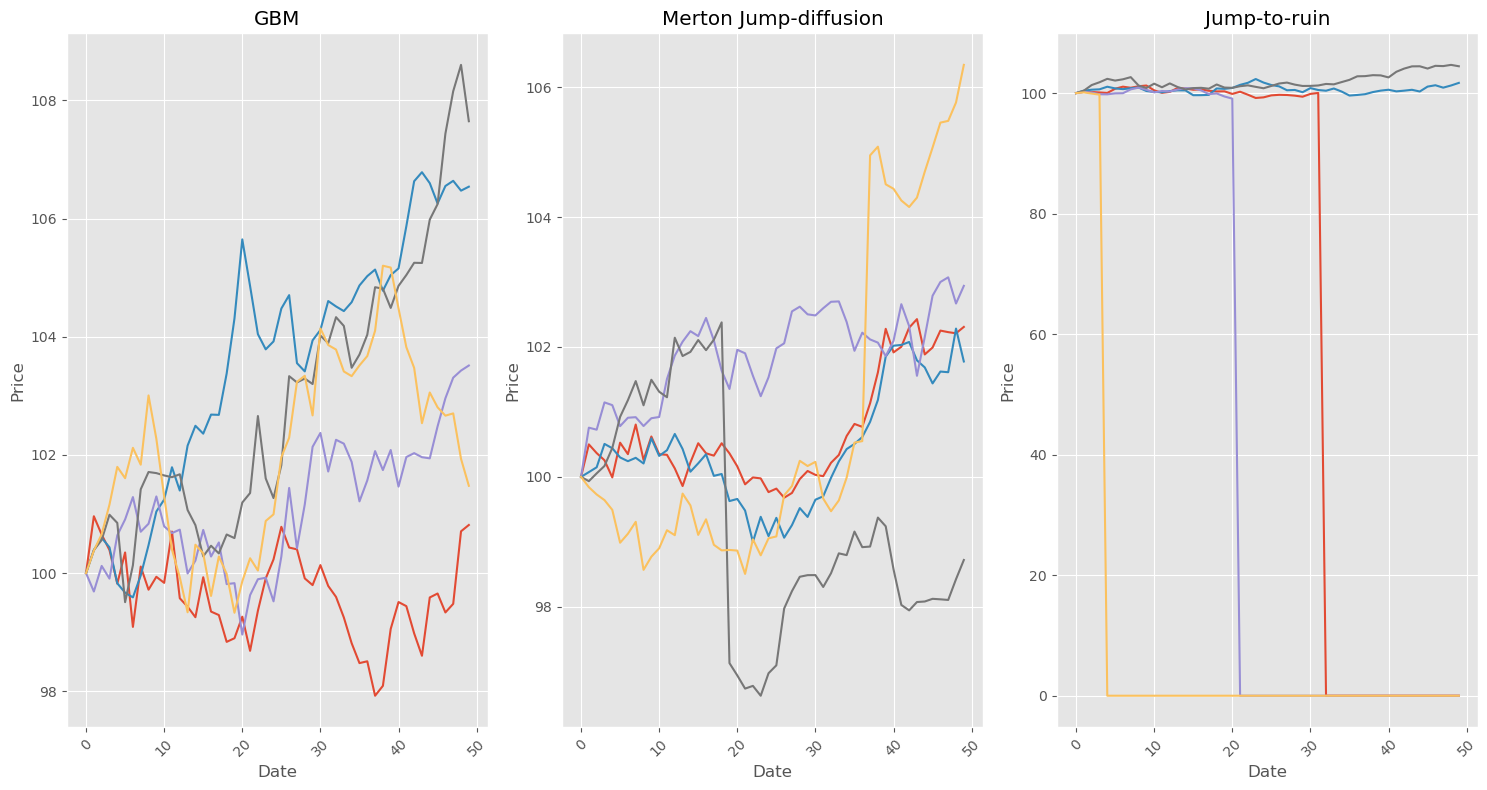

In [151]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 8))

axs[0].plot(GBM.T, lw=1.5)
axs[0].set_title("GBM")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Price")
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(Merton.T, lw=1.5)
axs[1].set_title("Merton Jump-diffusion")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Price")
axs[1].tick_params(axis='x', rotation=45)

axs[2].plot(Drop.T, lw=1.5)
axs[2].set_title("Jump-to-ruin")
axs[2].set_xlabel("Date")
axs[2].set_ylabel("Price")
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()